In [1]:
import matplotlib.pyplot as plt
import numpy as np
import bezier

from bezier.hazmat.curve_helpers import evaluate_hodograph, get_curvature

# 2D Data

(100, 2)


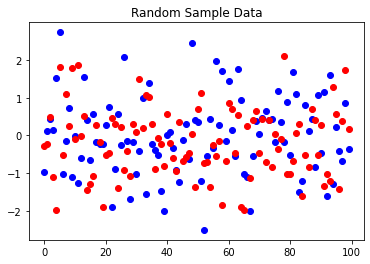

In [2]:
# 2D sample data
N = 100
D = 2

sample_2D = np.random.randn(N, D)
print(sample_2D.shape)


plt.scatter(range(100), sample_2D[:,0], color='blue')
plt.scatter(range(100), sample_2D[:,1], color='red')
plt.title("Random Sample Data")
plt.show()
plt.close()

<Curve (degree=99, dimension=2)>


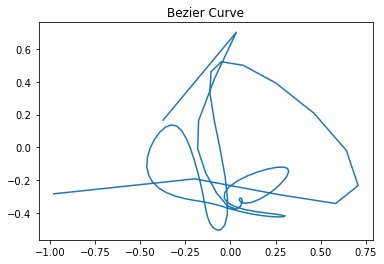

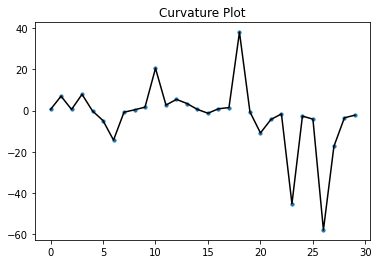

The Number of Curvature 30
[0.5742948594361151, 7.020340732719732, 0.5714911724948939, 7.894435005710336, -0.17791269608309374, -4.833833256358083, -14.309878002573734, -0.7678104449677621, 0.3891948200097622, 1.6814391281290826, 20.521818304563038, 2.6848300610045297, 5.451289478473179, 3.4444796240078377, 0.5628388874779168, -1.2638061312452318, 0.8979048767432413, 1.47098288574483, 38.031366200829176, -0.6233295129121096, -10.835653519863062, -4.294632401466395, -1.5969748125047296, -45.20238369734207, -2.655834083611718, -4.133277874480925, -57.89066580816725, -17.338350487030315, -3.479174925029849, -2.2123990432002625]


In [13]:
# When curve approximation, need to transpose (D, N)
curve = bezier.Curve.from_nodes(sample_2D.T)
print(curve)
curve.plot(num_pts=N, color=None, alpha=None, ax=None)
plt.title("Bezier Curve")
plt.show()


curvature = []
Number = 30


for s in range(Number):
    t = s / Number # 0 ~ 1
    tangent_vec = curve.evaluate_hodograph(t)
    curvature.append(get_curvature(sample_2D.T, tangent_vec, t))
    

plt.plot(curvature, color='black')
plt.scatter(range(len(curvature)), curvature, s = 10)
plt.title("Curvature Plot")
plt.show()
plt.close()

print("The Number of Curvature", len(curvature))
print(curvature)

# 3D Data

(100, 3)


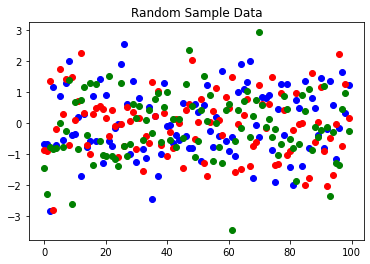

In [15]:
# 2D sample data
N = 100
D = 3

sample_3D = np.random.randn(N, D)
print(sample_3D.shape)


plt.scatter(range(100), sample_3D[:,0], color='blue')
plt.scatter(range(100), sample_3D[:,1], color='red')
plt.scatter(range(100), sample_3D[:,2], color='green')
plt.title("Random Sample Data")
plt.show()
plt.close()

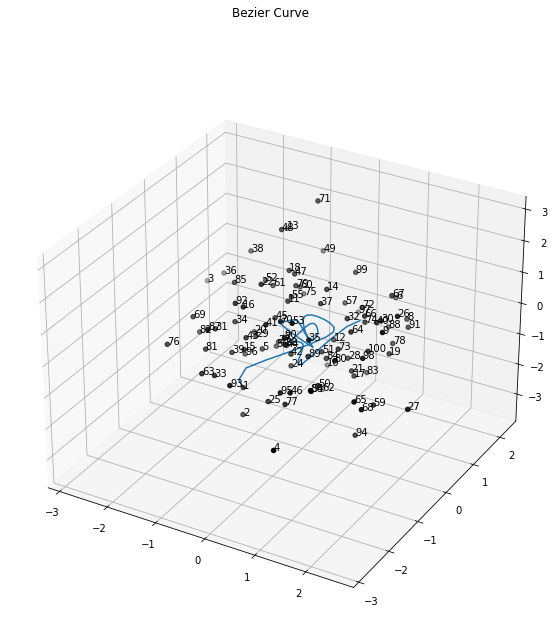

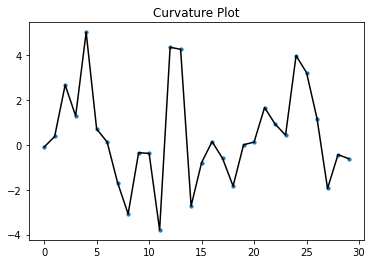

The Number of Curvature 30
[-0.0984848014167313, 0.37052478872182654, 2.6660955515064675, 1.2860659887033943, 5.0138156517408685, 0.702159774645132, 0.12616265048824882, -1.6939439916456323, -3.0797159511124303, -0.3501445178880055, -0.38298822730045834, -3.791150584112159, 4.34401786393549, 4.253710346051427, -2.7241417474443708, -0.7930776766940034, 0.14238725020219772, -0.6070075506136714, -1.8397598060896099, 0.001875823458936256, 0.12140518418289957, 1.6610111723011438, 0.9264501010951788, 0.43135425201362126, 3.9713856366826743, 3.214150885089866, 1.164821502610326, -1.9460641484159193, -0.4365808303091307, -0.6143999335693273]


In [29]:
# When curve approximation, need to transpose (D, N)
curve = bezier.Curve.from_nodes(sample_3D.T)
fig = plt.figure(figsize=(10,10))
fig.suptitle("Bezier Curve")

ax = fig.add_subplot(projection='3d')

# Embedding Points ##
nodes = curve.nodes
ax.scatter(
    nodes[0, :],    # z-coordinates.
    nodes[1, :],    # z-coordinates.
    nodes[2, :],    # z-coordinates.
    color='black'
)

for i in range(len(nodes[0])):
    ax.text(
        nodes[0, i],    # z-coordinates.
        nodes[1, i],    # z-coordinates.
        nodes[2, i],    # z-coordinates.
        '{}'.format((i)+1)
    )
p=100
## Bezier Points ##
ts = np.arange(0, 1, 1/p)
curve_points = []
for t in ts:
    curve_points.append(curve.evaluate(t).squeeze())


curve_points = np.stack(curve_points).T

ax.plot(
    curve_points[0, :],    # z-coordinates.
    curve_points[1, :],    # z-coordinates.
    curve_points[2, :],    # z-coordinates.
)

plt.show()
plt.close()

curvature = []
Number = 30


for s in range(Number):
    t = s / Number # 0 ~ 1
    tangent_vec = curve.evaluate_hodograph(t)
    curvature.append(get_curvature(sample_3D.T, tangent_vec, t))
    

plt.plot(curvature, color='black')
plt.scatter(range(len(curvature)), curvature, s = 10)
plt.title("Curvature Plot")
plt.show()
plt.close()

print("The Number of Curvature", len(curvature))
print(curvature)

In [ ]:
    def curvature(self, X_pca, name, plot):
        

        curves = []
        step  = int(X_pca.shape[0] * (1/100)) # 100개 정도 sampling
        index = np.arange(0, X_pca.shape[0], step)



        embedding = X_pca[index] # Controll Points
        curve = bezier.Curve.from_nodes(embedding.T)


        if plot == True: self.plot_bezier(curve, name)
        kappa = []

        for s in range(X_pca.shape[0]):
            t = s / X_pca.shape[0]
            tangent_vec = curve.evaluate_hodograph(t)
            kappa.append(get_curvature(embedding.T, tangent_vec, t))

        if self.norm: kappa = minmax_scale(kappa)


        if plot == True: self.plot_curvature(kappa, name)

        return kappa, curve
    
    def plot_bezier(self, curve, name, p=100):
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(name)
        
        ax = fig.add_subplot(projection='3d')

        # Embedding Points ##
        nodes = curve.nodes
        ax.scatter(
            nodes[0, :],    # z-coordinates.
            nodes[1, :],    # z-coordinates.
            nodes[2, :],    # z-coordinates.
            color='black'
        )
        
        for i in range(len(nodes[0])):
            ax.text(
                nodes[0, i],    # z-coordinates.
                nodes[1, i],    # z-coordinates.
                nodes[2, i],    # z-coordinates.
                '{}'.format((i)+1)
            )

        ## Bezier Points ##
        ts = np.arange(0, 1, 1/p)
        curve_points = []
        for t in ts:
            curve_points.append(curve.evaluate(t).squeeze())


        curve_points = np.stack(curve_points).T

        ax.plot(
            curve_points[0, :],    # z-coordinates.
            curve_points[1, :],    # z-coordinates.
            curve_points[2, :],    # z-coordinates.
        )


        plt.savefig('./plot/bezier/BezierCurve_{}.jpeg'.format(name))
#         plt.show()
        plt.close()
        
    def plot_curvature(self, K, name):
        plt.plot(K, color='black')
        plt.scatter(range(len(K)), K, s = 10)
        plt.title(name)
        plt.savefig('./plot/curvature/Kappa_{}.jpeg'.format(name))
#         plt.show()
        plt.close()